In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [62]:
ratings="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/ratings.csv"
movies="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/movies.csv"

# If data stored locally
# ratings="./data/ratings.csv"
# movies="./data/movies.csv"

df_ratings = pd.read_csv(ratings, sep=',')
df_ratings.columns = ['userId', 'itemId', 'rating', 'timestamp']
df_movies = pd.read_csv(movies, sep=',')
df_movies.columns = ['itemId', 'title', 'genres']

In [63]:
df_movies.head(20)

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [64]:
df_ratings.head(20)

,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [65]:
df_ratings = df_ratings.fillna(0)
df_ratings.head()

,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


4

In [66]:
gk = df_ratings.groupby('userId') 

In [67]:
gk.first()

,itemId,rating,timestamp
userId,,,
1,1,4.0,964982703
2,318,3.0,1445714835
3,31,0.5,1306463578
4,21,3.0,986935199
5,1,4.0,847434962
...,...,...,...
606,1,2.5,1349082950
607,1,4.0,964744033
608,1,2.5,1117408267


In [68]:
df_rat = gk.get_group(10)

In [69]:
df_rat['rating'].describe()

count    140.000000
mean       3.278571
std        1.175700
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [70]:
numrat = df_ratings.groupby('rating').count()


In [71]:
df_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

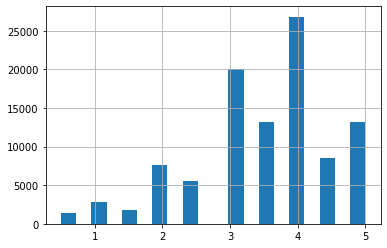

In [72]:
df_ratings['rating'].hist(bins=20)

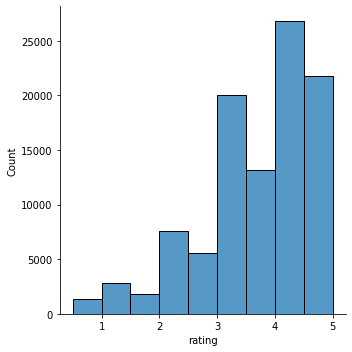

In [73]:
sns.displot(df_ratings, x="rating", binwidth=.5)


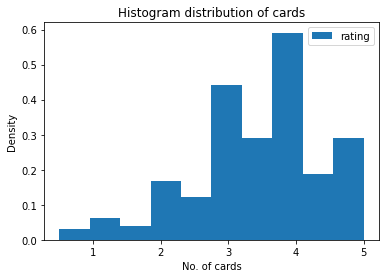

In [74]:
df_ratings[['rating']].plot(kind='hist', alpha = 1, density = True, rwidth=1)
plt.title('Histogram distribution of cards')
plt.xlabel('No. of cards')
plt.ylabel('Density')
plt.show()

In [75]:
df_rat = df_ratings.pivot(index='userId',columns='itemId',values='rating')  
print (df_rat)

itemId  1       2       3       4       ...  193583  193585  193587  193609
userId                                  ...                                
1          4.0     NaN     4.0     NaN  ...     NaN     NaN     NaN     NaN
2          NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
3          NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
4          NaN     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
5          4.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
...        ...     ...     ...     ...  ...     ...     ...     ...     ...
606        2.5     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
607        4.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
608        2.5     2.0     2.0     NaN  ...     NaN     NaN     NaN     NaN
609        3.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN
610        5.0     NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN

[610 rows x

In [76]:
df_rat = df_rat.fillna(0)
df_rat.head()

itemId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_user_item = df_ratings.pivot(index='userId',columns='itemId',values='rating') 
################################

# Sort index/rows (userId's) and columns (itemId's)
df_user_item.sort_index(axis=0, inplace=True)
df_user_item.sort_index(axis=1, inplace=True)
df_user_item = df_user_item.fillna(0)
#df_user_item.head()

In [77]:
def encode_ids(data):
    '''Takes a rating dataframe and return: 
    - a simplified rating dataframe with ids in range(nb unique id) for users and movies
    - 2 mapping disctionaries
    
    '''

    data_encoded = data.copy()
    
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])  # df of all unique users
    dict_users = users.to_dict()    
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}

    items = pd.DataFrame(data_encoded.itemId.unique(),columns=['itemId']) # df of all unique items
    dict_items = items.to_dict()    
    inv_dict_items = {v: k for k, v in dict_items['itemId'].items()}

    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.itemId = data_encoded.itemId.map(inv_dict_items)

    return data_encoded, dict_users, dict_items

In [78]:
t = df_rat.loc[10][:30]

In [79]:
print(t)

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
Name: 10, dtype: float64


In [80]:
df_rat.loc[21][:]

itemId
1         3.5
2         3.5
3         0.0
4         0.0
5         0.0
         ... 
193581    0.0
193583    0.0
193585    0.0
193587    0.0
193609    0.0
Name: 21, Length: 9724, dtype: float64

In [81]:
item_rated_user_21 = df_rat.loc[21].dropna().index
item_rated_user_21

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', name='itemId', length=9724)

In [82]:
def SGD(data,           # dataframe containing 1 user|item|rating per row
        n_factors, # number of factors
        alpha,    # number of factors
        n_epochs,   # number of iteration of the SGD procedure
       ):
    '''Learn the vectors P and Q (ie all the weights p_u and q_i) with SGD.
    '''

    # Encoding userId's and itemId's in data
    data, dict_users, dict_items = encode_ids(data)
    
    ##### FILL HERE (2 lines) ######
    n_users = 9724  # number of unique users
    n_items = 9724  # number of unique items
    ################################
    
    # Randomly initialize the user and item factors.
    p = np.random.normal(0, .01, (n_users, n_factors))
    q = np.random.normal(0, .01, (n_items, n_factors))

    # Optimization procedure
    for epoch in range(n_epochs):
        print ('epoch: ', epoch)
        # Loop over the rows in data
        for index in range(data.shape[0]):
            row = data.iloc[[index]]
            u = int(row.userId)      # current userId = position in the p vector (thanks to the encoding)
            i = int(row.itemId)      # current itemId = position in the q vector
            r_ui = float(row.rating) # rating associated to the couple (user u , item i)
            
            ##### FILL HERE (1 line) ######
            err = r_ui-np.dot(p[u],q[i].transpose())   # difference between the predicted rating (p_u . q_i) and the known ratings r_ui
            ################################
            
            # Update vectors p_u and q_i
            ##### FILL HERE (2 lines) ######
            p_old = p[u]
            p[u] = p[u]+alpha*err*q[i]  # cf. update rule above 
            q[i] = q[i]+alpha*err*p_old
            ################################
            
    return p, q

In [83]:
p, q = SGD(df_ratings,10,0.01,3)

epoch:  0
epoch:  1
epoch:  2


In [84]:
p = np.random.normal(0, .01, (9724, 10))
q = np.random.normal(0, .01, (9724, 10))

In [85]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000203,0.000310,-0.000263,-0.000011,0.000039,-0.000258,0.000187,-0.000161,0.000130,0.000191,-0.000295,0.000211,0.000160,-0.000160,-0.000019,-0.000092,0.000303,0.000395,-0.000169,0.000302,-0.000163,0.000193,0.000360,-0.000091,-0.000257,0.000010,-0.000477,0.000612,-0.000243,0.000031,-0.000072,-0.000224,-0.000117,-6.952805e-08,-0.000400,-0.000162,-0.000047,-0.000206,0.000225,0.000212,...,0.000104,0.000512,0.000102,-0.000258,0.000593,0.000239,0.000188,-0.000029,-0.000032,-0.000215,-0.000222,-0.000073,-0.000135,-0.000204,0.000219,-0.000098,0.000076,-0.000023,0.000212,-0.000192,0.000111,-0.000217,0.000047,0.000225,0.000311,0.000048,-0.000073,-0.000352,-0.000440,-0.000383,-0.000034,-0.000199,0.000144,-0.000309,0.000250,0.000145,-0.000584,0.000100,-0.000266,-0.000277
1,0.000247,0.000327,-0.000101,0.000198,-0.000400,0.000106,0.000158,0.000282,0.000082,0.000036,-0.000288,-0.000187,0.000250,0.000117,-0.000455,0.000350,0.000190,0.000172,-0.000058,0.000118,0.000265,0.000018,-0.000160,-0.000064,0.000059,-0.000018,-0.000331,0.000060,-0.000115,0.000099,0.000074,-0.000183,-0.000348,2.284343e-04,-0.000025,-0.000011,0.000275,0.000519,-0.000209,0.000057,...,-0.000079,0.000409,-0.000216,-0.000210,0.000355,-0.000047,0.000297,0.000376,-0.000233,0.000041,-0.000060,-0.000177,-0.000004,-0.000095,-0.000132,0.000086,-0.000150,0.000029,-0.000067,-0.000099,-0.000227,0.000096,0.000474,-0.000017,-0.000064,-0.000187,-0.000082,-0.000018,-0.000095,-0.000193,-0.000162,-0.000312,0.000082,0.000125,0.000222,0.000320,-0.000216,0.000233,-0.000300,-0.000109
2,0.000135,0.000171,-0.000050,0.000079,-0.000700,0.000258,0.000045,0.000616,-0.000447,-0.000214,0.001029,-0.000520,0.000090,0.000250,-0.000646,0.000577,-0.000070,-0.000645,0.000067,0.000173,0.000300,-0.000070,-0.000407,0.000134,0.000475,0.000436,0.000334,-0.000316,0.000589,0.000367,0.000215,0.000051,-0.000624,9.115954e-05,0.000416,-0.000051,0.000326,0.000679,-0.000499,0.000139,...,-0.000670,-0.000536,0.000041,-0.000468,-0.000294,-0.000719,-0.000213,0.000107,0.000088,0.000699,0.000362,0.000161,-0.000063,0.000327,-0.000296,-0.000167,-0.000499,0.000210,0.000010,-0.000011,-0.000383,0.000121,0.000480,-0.000130,-0.000450,-0.000088,-0.000227,0.000537,0.000556,0.000450,0.000315,-0.000095,-0.000218,0.000082,0.000126,-0.000066,-0.000079,0.000390,0.000194,0.000160
3,0.000591,0.000693,-0.000235,-0.000633,0.000452,-0.000354,0.000554,0.000113,0.000176,0.000129,-0.000504,0.000319,0.000361,-0.000074,0.000236,-0.000629,0.000020,-0.000013,-0.000198,-0.000063,0.000054,-0.000425,-0.000398,0.000096,-0.000115,-0.000909,-0.000270,-0.000946,-0.000201,-0.000001,0.000109,-0.000241,0.000293,-6.609113e-05,0.000224,0.000033,-0.000232,0.000337,0.000436,-0.000173,...,0.000517,0.000012,0.000084,0.000373,-0.000322,0.000153,0.000163,0.000607,-0.000205,-0.000457,-0.000162,0.000381,0.000122,0.000121,0.000181,0.000270,-0.000016,0.000251,-0.000395,0.000138,-0.000011,0.000198,-0.000193,0.000072,0.000219,0.000104,0.000122,-0.000169,-0.000220,-0.000616,-0.000217,-0.000268,-0.000353,0.000188,0.000176,-0.000247,-0.000203,-0.000071,-0.000462,-0.000118
4,-0.000301,-0.000353,-0.000005,-0.000138,0.000393,0.000047,-0.000123,-0.000496,0.000256,0.000226,0.000096,0.000051,-0.000608,-0.000304,-0.000033,0.000141,-0.000278,0.000203,-0.000028,0.000023,-0.000075,-0.000074,0.000559,-0.000327,-0.000268,0.000073,0.000144,0.000180,-0.000398,-0.000377,-0.000137,-0.000117,0.000534,2.063459e-04,-0.000069,-0.000119,-0.000079,-0.000847,-0.000185,0.000067,...,-0.000136,0.000065,-0.000213,0.000069,0.000383,0.000153,-0.000022,-0.000495,0.000569,-0.000023,-0.000069,-0.000283,-0.000054,-0.000751,0.000393,-0.000041,0.000220,-0.000250,0.000037,-0.000601,0.000346,-0.000238,

In [86]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [87]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.000203,-0.000217,0.000310,-0.000495,0.000208,-0.000263,-0.000091,-0.000060,0.000051,-0.000144,0.000020,-0.000264,-0.000040,0.000190,0.000199,-0.000140,0.000219,-0.000462,0.000069,-0.000325,-0.000227,0.000204,-0.000188,0.000057,0.000117,-0.000344,-0.000137,-0.000156,0.000132,-0.000251,0.000319,0.000053,0.000476,-0.000383,0.000138,0.000038,-0.000122,0.000426,-0.000050,0.000199,...,-0.000259,0.000189,0.000030,-0.000025,-0.000115,-0.000254,0.000130,0.000027,-0.000534,-0.000305,0.000317,0.000340,0.000105,-0.000061,-0.000240,-0.000128,-0.000004,-0.000076,0.000376,-0.000241,-0.000108,0.000164,0.000146,0.000284,-0.000003,0.000066,-0.000443,0.000182,0.000130,0.000091,-0.000096,-1.885879e-04,-0.000094,-0.000244,0.000040,0.000188,-0.000305,0.000259,-0.000026,-0.000171
2,0.000247,0.000004,0.000327,-0.000166,-0.000032,-0.000101,0.000103,0.000415,-0.000037,0.000023,-0.000247,-0.000142,-0.000066,-0.000236,-0.000105,-0.000015,0.000136,0.000176,0.000450,0.000165,-0.000075,0.000112,0.000151,-0.000022,0.000032,-0.000102,0.000041,0.000106,0.000120,0.000155,-0.000007,0.000217,0.000296,-0.000314,-0.000034,-0.000062,0.000112,0.000283,0.000027,0.000404,...,-0.000174,0.000246,0.000231,0.000296,-0.000085,0.000178,0.000175,0.000217,0.000217,-0.000068,-0.000167,-0.000076,0.000088,-0.000016,-0.000441,-0.000101,-0.000181,-0.000286,0.000250,0.000024,-0.000074,0.000046,0.000040,0.000020,0.000030,-0.000034,-0.000646,-0.000207,0.000178,0.000050,-0.000023,-2.685453e-04,0.000359,0.000107,-0.000470,0.000163,0.000286,-0.000012,0.000484,-0.000245
3,0.000135,0.000183,0.000171,0.000535,-0.000350,-0.000050,-0.000105,0.000882,0.000167,0.000671,0.000354,-0.000256,-0.000134,-0.000381,-0.000547,0.000077,0.000134,0.000596,0.000269,0.000258,-0.000207,-0.000059,0.000452,-0.000073,-0.000049,0.000219,0.000263,0.000412,0.000235,0.000417,-0.000049,0.000253,-0.000795,-0.000127,-0.000199,0.000071,0.000371,0.000087,-0.000173,0.000414,...,0.000101,0.000243,0.000089,0.000486,-0.000004,0.000393,0.000348,-0.000088,0.000831,0.000292,-0.000698,-0.000516,-0.000413,0.000033,-0.000119,-0.000126,-0.000348,-0.000321,-0.000359,0.000300,0.000193,-0.000422,0.000116,-0.000312,0.000149,-0.000018,-0.000161,-0.000163,0.000118,-0.000275,-0.000135,-2.361549e-04,0.000520,0.000254,-0.000134,0.000361,0.001275,-0.000195,0.000681,-0.000222
4,0.000591,-0.000188,0.000693,0.000111,-0.000758,-0.000235,0.000380,-0.000093,0.000034,-0.000279,-0.000631,0.000214,-0.000030,0.000201,0.000190,-0.000620,-0.000437,0.000007,0.000071,-0.000277,-0.000177,-0.000141,-0.000446,0.000195,0.000040,-0.000046,0.000181,-0.000338,-0.000187,0.000117,-0.000575,-0.000192,0.000780,0.000065,-0.000172,-0.000089,-0.000273,-0.000442,0.000184,-0.000092,...,0.000242,0.000016,0.000157,-0.000458,-0.000325,0.000454,-0.000318,0.000123,-0.000102,-0.000137,0.000087,-0.000310,0.000687,0.000025,0.000159,-0.000058,-0.000796,-0.000464,-0.000247,-0.000113,0.000052,-0.000088,0.000151,-0.000239,-0.000430,0.000069,0.000161,0.000114,-0.000105,-0.000068,-0.000078,1.981075e-04,-0.000325,0.000036,0.000372,0.000455,0.000065,-0.000407,0.000190,-0.000221
5,-0.000301,0.000003,-0.000353,-0.000073,0.000481,-0.000005,0.000028,-0.000187,-0.000099,0.000033,-0.000200,0.000455,0.000170,0.000162,0.000141,0.000065,0.000107,-0.000167,0.000055,-0.000093,0.000548,-0.000035,-0.000029,0.000173,-0.000138,-0.000199,-0.000081,-0.000464,0.000259,-0.000143,-0.000220,0.000237,0.000160,0.000031,0.000111,-0.000153,-0.000191,0.000093,-0.000115,-0.000040,...,-0.000162,-0.000517,-0.000319,-0.000199,-0.000045,-0.000202,0.000229,0.000191,-0.000328,-0.000166,0.000210,0.000157,0.000024,0.000302,0.000

In [93]:
df_user_item.loc[3][:10]

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: 3, dtype: float64

In [94]:
df_user_item_filled.loc[3][:10]

1     0.000135
2     0.000183
3     0.000171
4     0.000535
5    -0.000350
6    -0.000050
7    -0.000105
8     0.000882
9     0.000167
10    0.000671
Name: 3, dtype: float64

In [95]:
recommendations = list((df_user_item_filled.loc[3][:10]).sort_values(ascending=False)[:10].index)
recommendations

[8, 10, 4, 2, 3, 9, 1, 6, 7, 5]

In [96]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [97]:
already_rated = list((df_user_item.loc[3][:10]).sort_values(ascending=False)[:10].index)
already_rated

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [98]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [99]:
p, q = SGD(df_ratings,20,0.01,6)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5


In [100]:
p = np.random.normal(0, .01, (9724, 20))
q = np.random.normal(0, .01, (9724, 20))

In [101]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000218,-0.001244,0.001232,-0.000486,-0.000618,0.000784,-0.000185,-0.000576,0.000998,0.000487,-0.000199,-0.000621,-0.000549,0.000264,-0.000094,0.000061,0.000606,0.000149,0.000295,-0.000282,-0.000103,0.000146,-0.000946,0.000363,0.000238,0.000131,0.000616,-0.000263,0.000270,0.000197,-0.000182,0.000182,0.000673,-0.000052,-0.000256,-0.000223,-0.000415,0.000451,0.000459,0.000026,...,-0.000222,0.000521,-0.000457,0.000354,-0.000155,-0.000637,-0.000088,-0.000683,0.000376,0.000239,0.000044,-0.000227,0.000328,0.000258,0.000421,0.000509,0.000145,0.000098,0.000247,-0.000334,0.000074,0.000711,-0.000363,-0.000804,0.000740,0.000216,-0.000659,0.000835,0.000538,0.000434,0.000429,0.000439,-0.000685,0.000056,-0.000405,-0.000641,-0.000253,0.000468,-0.000256,-1.162421e-03
1,-0.000875,0.001061,-0.000918,-0.000019,0.000600,-0.000262,-0.000493,0.000552,-0.000899,-0.000370,-0.000204,-0.000006,0.000635,0.000492,0.000546,0.000110,-0.000102,-0.000145,0.000140,-0.000145,0.000370,-0.000130,-0.000166,-0.000131,0.000291,-0.000529,-0.000123,0.000274,-0.000410,0.000294,-0.000076,0.000316,0.000386,0.000053,-0.000105,0.000188,0.000433,0.000857,0.000128,0.000341,...,-0.000059,-0.000701,0.000214,-0.000340,-0.000205,0.000198,0.000009,0.000920,0.000439,0.000191,-0.000432,0.000916,-0.000012,0.000454,0.000068,-0.000539,0.000916,-0.000287,0.000341,-0.000857,-0.000062,0.000671,0.000432,0.000336,-0.001583,0.000182,0.000330,-0.000185,-0.000393,0.000194,0.000465,-0.000508,0.000435,0.000393,-0.000452,-0.000216,0.000239,-0.000736,0.000351,6.770030e-04
2,-0.000598,0.001022,-0.000902,-0.000194,0.000562,-0.000708,-0.000546,0.000695,-0.001336,-0.000818,0.000057,0.000703,0.000747,0.000663,0.000302,0.000054,-0.000146,-0.000226,-0.000182,-0.000047,-0.000013,0.000062,0.000665,0.000519,-0.000442,-0.000161,0.000157,0.000630,-0.000559,0.000291,-0.000194,-0.000213,0.001246,0.000230,0.000855,-0.000237,0.000860,0.000275,-0.000372,-0.000818,...,0.000072,0.000512,-0.000704,-0.000261,0.000576,0.000540,0.000034,0.000292,0.000059,-0.000389,-0.000439,0.000176,0.000128,0.000997,0.001202,-0.000664,0.000508,-0.000506,0.000934,-0.000517,0.000207,0.000033,0.000080,-0.000248,-0.000749,-0.000205,0.000678,-0.000540,-0.000485,-0.001070,-0.000438,-0.000070,0.000802,-0.000311,0.000066,-0.000232,0.000487,-0.001249,0.000265,1.807551e-07
3,0.000454,-0.000995,0.000306,-0.000068,-0.000212,0.000229,0.000119,-0.000245,0.000315,0.000608,0.000077,-0.000800,-0.000173,-0.000005,0.000574,-0.000744,0.000328,0.000326,-0.000507,0.000423,-0.000048,-0.000407,0.000370,0.000044,0.000465,0.000230,0.000140,-0.000284,0.000082,-0.000351,-0.000086,-0.000047,-0.000102,-0.000014,-0.000138,0.000104,0.000712,0.000417,0.000240,-0.000228,...,0.000337,-0.000222,-0.000473,0.000368,0.000595,0.000433,-0.000163,-0.000513,0.000279,-0.000117,-0.000417,0.000262,0.000241,-0.000107,-0.000199,0.000600,-0.000134,-0.000221,-0.000088,0.000447,-0.000157,-0.000004,-0.000303,0.000406,0.000158,0.000451,-0.000849,0.000307,0.000533,0.000088,-0.000335,-0.000125,-0.000885,0.000146,0.000259,-0.000338,0.000101,0.000202,0.000056,2.131756e-05
4,-0.000205,0.000653,-0.000405,0.000270,-0.000100,-0.000246,0.000308,-0.000176,-0.000551,-0.000553,0.000178,0.000946,0.000318,0.000583,-0.000100,0.000464,-0.000279,-0.000923,0.000465,-0.000232,0.000173,0.000510,0.000021,-0.000032,-0.000113,-0.000039,-0.000527,0.000180,0.000013,0.000435,0.000248,-0.000054,0.000242,0.000025,0.000478,-0.000544,-0.000727,0.000016,-0.000213,0.000297,...,0.000189,0.000205,0.000139,-0.000154,-0.000690,-0.000082,-0.000568,0.000445,-0.000230,-0.000400,0.000474,-0.000352,-0.000551,-0.000158,0.000294,-0.000486,-0.000032,0.000211,-0.000107,-0.000356,0.000285,-0.000157,0.000886,-0.000188,-

In [102]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [103]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.000218,0.001020,-0.001244,0.000143,0.000225,0.001232,0.000551,-0.000866,-0.000284,0.000483,-0.000072,0.000150,0.000290,0.000778,-0.000212,0.000111,0.000097,0.000484,-0.000564,0.001279,-0.000022,0.000510,0.000572,-0.000187,0.000022,0.000142,-0.000575,0.000016,0.000770,0.000165,0.000583,-0.000618,-0.001055,0.000040,0.000442,0.000234,-0.000162,0.000666,-0.000459,-0.000380,...,0.000283,0.000282,0.000458,0.000617,-0.000365,0.000397,0.000065,-0.000100,0.000424,-0.000238,-0.000052,0.000503,0.000506,-0.000129,-0.000455,0.000246,-0.000311,0.000309,-0.000424,-0.000303,0.000161,0.000189,9.827993e-04,-0.000443,0.000560,0.000315,0.000405,-0.000313,-0.000261,-0.000341,-6.183675e-04,-0.000345,-0.000075,0.000205,-0.000794,-0.000536,0.000277,0.000849,0.000056,-0.000445
2,-0.000875,-0.001351,0.001061,-0.000687,-0.000698,-0.000918,-0.000369,0.000570,0.000319,0.000266,-0.000373,-0.000112,0.000645,-0.000260,0.000361,0.000226,-0.000592,-0.000055,-0.000113,-0.000275,0.000331,0.000295,-0.000409,0.000276,-0.000706,-0.000318,-0.000015,-0.000663,-0.000732,0.000187,-0.000305,0.000426,-0.000327,-0.000163,0.000543,-0.000140,-0.000292,-0.000200,-0.000123,0.000500,...,-0.000309,-0.000655,-0.000704,0.000117,0.000536,0.000184,0.000393,0.000305,-0.000374,0.000536,0.000116,-0.000761,-0.000600,-0.000787,0.000012,-0.000305,0.000255,0.000410,0.000298,-0.000175,0.000516,-0.000029,1.897129e-04,0.000084,-0.000140,-0.000255,0.000039,0.000044,-0.000468,-0.000388,-4.881218e-04,-0.000461,0.000089,-0.000068,0.000008,0.000080,0.000775,0.000075,0.000683,-0.000101
3,-0.000598,-0.000289,0.001022,-0.000161,-0.000643,-0.000902,0.000103,-0.000379,0.000088,-0.000107,-0.000199,-0.000495,0.000224,0.000896,0.001084,-0.000288,-0.000452,-0.000343,-0.000298,0.000099,0.000383,0.000891,-0.000369,-0.000208,-0.000663,0.000133,-0.000526,0.000565,-0.000195,0.001128,-0.000615,0.000111,-0.000731,0.000262,0.000615,0.000268,0.000643,0.000207,-0.000195,-0.000183,...,-0.000195,-0.000795,-0.000217,0.000562,0.000245,-0.000221,-0.000101,0.000420,-0.000272,0.000295,0.000708,0.000099,-0.000275,-0.000496,0.000092,-0.001222,0.000201,0.000613,0.000495,-0.000467,-0.000060,-0.000241,8.271451e-07,-0.000053,-0.000522,-0.000545,-0.000138,0.000209,0.000049,-0.000726,1.292247e-07,-0.000413,0.000556,0.000491,-0.000109,0.000589,-0.000301,-0.000439,0.000299,-0.000136
4,0.000454,-0.000216,-0.000995,0.000390,0.000337,0.000306,0.000125,0.000115,-0.000350,-0.000222,0.000332,0.000242,-0.000305,0.000152,0.000098,0.000263,0.000854,0.000081,-0.000025,0.000159,0.000170,0.000207,0.000176,-0.000199,0.000828,-0.000439,0.000393,0.000212,0.000121,0.000035,0.000045,-0.000319,-0.000150,0.000053,-0.000171,0.000257,0.000215,0.000136,-0.000167,0.000162,...,0.000309,-0.000247,-0.000063,-0.000017,-0.000548,0.000019,-0.000511,0.000207,0.000125,-0.000004,-0.000278,0.000364,0.000445,0.000401,-0.000532,0.000568,0.000128,-0.000215,-0.000162,-0.000103,-0.000121,0.000607,5.314723e-04,-0.000277,0.000439,0.000189,-0.000055,-0.000013,-0.000569,-0.000371,-3.727103e-04,-0.000135,-0.000018,-0.000440,-0.000253,0.000129,-0.000276,0.000568,-0.000395,-0.000041
5,-0.000205,0.000264,0.000653,-0.000444,-0.000342,-0.000405,-0.000193,-0.000159,0.000405,-0.000171,0.000049,0.000109,0.000507,-0.000251,-0.000352,-0.000127,-0.000377,0.000313,0.000738,-0.000013,0.000362,-0.000224,-0.000111,0.000088,-0.000572,0.000481,-0.000193,-0.000273,0.000192,-0.000035,-0.000213,0.000084,0.000147,-0.000007,-0.000140,0.000250,-0.000138,-0.000507,0.000403,0.000080,...,-0.000265,0.000596,0.000624,0.000277,0.000758,-0.000357,0.000155,-0.000116,0.000016,-0.000098,0.000216,-0.000401,-0.00037

In [104]:
df_user_item.loc[3][:10]

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: 3, dtype: float64

In [105]:
df_user_item_filled.loc[3][:10]

1    -0.000598
2    -0.000289
3     0.001022
4    -0.000161
5    -0.000643
6    -0.000902
7     0.000103
8    -0.000379
9     0.000088
10   -0.000107
Name: 3, dtype: float64

In [106]:
recommendations = list((df_user_item_filled.loc[3][:10]).sort_values(ascending=False)[:10].index)
recommendations

[3, 7, 9, 10, 4, 2, 8, 1, 5, 6]

In [107]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [108]:
already_rated = list((df_user_item.loc[3][:10]).sort_values(ascending=False)[:10].index)
already_rated

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [109]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [110]:
p, q = SGD(df_ratings,40,0.01,18)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17


In [111]:
p = np.random.normal(0, .01, (9724, 40))
q = np.random.normal(0, .01, (9724, 40))

In [112]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.001012,-0.000171,0.000235,0.000189,0.000572,-0.000173,0.000511,-0.000183,0.000420,0.000296,0.000356,-0.000200,0.000902,0.000490,0.000169,0.000136,0.000703,-0.000152,-0.000291,0.000802,-0.000301,-1.294704e-04,0.000396,-0.000040,-0.000312,0.000014,0.000959,-0.000659,-0.000721,0.000109,0.000689,0.000187,-0.001025,-0.000045,-0.000275,-0.000105,0.000154,0.000853,0.000308,0.001019,...,-0.000242,-0.000178,-0.000385,-0.001104,0.000318,0.000121,-0.000200,0.000025,-0.000779,0.000331,-0.000088,-0.000136,0.000224,0.000289,-0.000150,-0.000013,-0.000057,0.000312,-0.000499,-0.000068,0.000004,-0.000692,-0.000297,-0.000440,0.000635,-0.000177,-0.000444,0.000203,0.000295,0.000820,-0.000612,0.000333,-0.000312,-0.000474,-0.000545,-0.000545,0.000929,-0.000400,-0.000459,0.000267
1,0.000567,-0.000455,-0.000367,0.000747,0.000931,0.000269,0.000032,0.000962,0.000093,-0.000331,-0.000047,0.000491,0.000582,0.001753,0.000638,-0.000138,-0.000766,-0.000383,0.000049,0.000213,0.000437,1.336330e-04,0.000507,0.001343,0.001227,0.000780,0.000115,-0.000677,0.000180,-0.000755,0.000255,0.000056,-0.000169,-0.000195,0.001037,-0.000265,0.000632,-0.000843,-0.000320,-0.000481,...,-0.000468,0.000874,-0.000309,-0.000236,0.000210,0.000345,0.000163,-0.000363,-0.000131,-0.000563,0.000613,0.000462,-0.000251,0.000359,0.000479,-0.000344,-0.000460,-0.001202,-0.000293,-0.000211,-0.000083,-0.001025,-0.000229,-0.000116,-0.001032,-0.001216,0.000474,-0.000451,0.000022,-0.000027,-0.000314,-0.000057,0.000413,-0.000691,-0.000808,0.000079,-0.000493,0.000693,-0.000356,-0.000295
2,0.000395,0.000177,-0.000047,0.000067,-0.000151,-0.000258,0.000404,0.000378,0.000703,-0.000608,-0.000139,0.000116,0.000750,-0.000184,-0.000445,-0.000380,-0.000706,-0.000337,0.000547,0.000763,0.000343,-3.662099e-04,0.000229,-0.000025,-0.000093,0.000353,-0.000027,0.000235,0.000966,0.000231,0.000126,0.000593,0.000840,0.000039,0.000437,0.000571,-0.000720,-0.000200,-0.000086,-0.000264,...,0.000006,-0.000534,0.000701,0.000908,0.000062,-0.000461,0.000366,-0.000560,0.000312,0.000189,-0.000199,-0.000154,-0.000668,0.000264,0.000121,-0.000234,0.000499,0.000082,-0.000046,0.000540,0.000158,-0.000266,-0.000524,-0.000374,0.000379,-0.000454,0.000254,0.000009,0.000227,-0.000856,-0.000232,0.000423,0.000058,-0.000390,0.000509,-0.000168,-0.000407,0.000162,0.000247,0.000397
3,0.000294,0.000131,0.000622,-0.000852,0.000732,-0.000125,0.000163,0.000169,-0.000447,0.000687,0.000025,0.000778,-0.000396,0.000679,0.001695,0.000370,-0.000552,0.000026,-0.000901,-0.001034,0.001929,-1.281914e-04,0.000479,-0.000741,0.000924,-0.000526,-0.000477,0.000135,0.000903,0.000963,0.001652,-0.000602,-0.002221,-0.000706,-0.000679,-0.000190,-0.000197,-0.000270,-0.001188,-0.001106,...,0.000538,0.000252,-0.001585,0.000198,-0.000285,-0.000780,-0.001917,0.000162,-0.000939,0.000178,0.001270,0.000279,0.000870,-0.001488,-0.000627,-0.000091,-0.000296,-0.000879,0.000391,0.000278,-0.000545,0.001218,0.000390,0.000277,0.000490,0.000004,0.001032,0.001597,0.000052,0.000626,0.000169,-0.001711,0.000156,0.000432,-0.000428,0.000748,0.001262,0.001740,-0.000859,0.000316
4,0.000128,0.001107,-0.000928,-0.000180,0.000461,0.000415,0.000110,-0.000245,0.000225,-0.000162,0.000132,0.000648,-0.001479,0.000821,-0.000127,0.000752,0.000662,-0.000251,0.000118,-0.000036,-0.000418,5.589431e-08,-0.000959,-0.000281,0.000219,-0.000312,0.000153,-0.000322,0.000893,-0.000704,-0.000947,0.000345,-0.000931,-0.000210,-0.000013,-0.000221,0.000976,0.000341,0.000184,0.001598,...,0.000387,0.000317,-0.000873,0.001060,0.000002,0.000034,-0.000410,0.000238,0.000091,0.000825,-0.000158,-0.000512,0.000366,-0.000585,0.000200,-0.000251,-0.001150,0.000787,-0.000533,-0.000914,0.000341,0.001355,0.000619,0.000735

In [113]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [114]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.001012,-0.001448,-0.000171,-0.000596,-0.000217,0.000235,0.000253,-0.000322,-0.000944,-0.000042,0.000545,-0.000210,0.000492,-0.000742,-0.000183,-0.001153,-0.000450,0.000263,0.000700,0.000045,0.000575,-0.000672,-0.000211,0.000638,-0.000213,0.000092,0.000128,0.000156,-0.000117,-0.000249,-0.000397,-0.000316,-0.000365,0.000023,-0.000644,-0.000712,-0.000688,-0.000178,0.000044,0.000086,...,0.000217,-0.000088,0.000140,-0.001194,-0.000687,-0.000059,0.000135,-0.000571,-0.000122,-0.000593,-0.000062,0.000150,0.000447,-0.000538,0.000301,-0.000283,-0.000229,-0.000558,0.000159,0.000099,0.000519,-0.000095,-0.000002,0.000310,-0.000291,-0.000184,0.000070,-0.000430,-0.001112,-0.000282,-3.116594e-04,0.000062,0.000076,0.000563,-0.000135,-0.000069,-0.000625,0.000516,-0.000130,0.000081
2,0.000567,-0.000339,-0.000455,0.000292,0.000180,-0.000367,0.000384,0.000901,-0.001286,-0.000195,-0.000049,-0.001585,0.000074,-0.000175,-0.000325,0.000318,-0.000688,-0.000340,-0.000842,-0.000544,-0.000802,0.001076,-0.000399,0.000952,-0.000031,0.001213,-0.000043,-0.000697,0.000238,-0.000584,-0.000008,0.000525,0.000325,-0.000591,-0.000134,0.001037,-0.001294,-0.000665,-0.000894,-0.000228,...,0.000083,-0.000463,-0.000142,0.000263,-0.000153,0.000049,0.000464,0.000475,-0.000084,-0.000423,0.000689,0.000105,-0.000457,0.000286,-0.000340,-0.000604,-0.000610,0.000396,0.000314,0.000527,-0.000060,0.000311,-0.000681,0.000616,0.000124,-0.000284,0.000421,-0.000322,0.000094,0.000512,-3.844300e-07,-0.000084,-0.000352,0.000233,0.000198,-0.000603,0.000117,0.000704,-0.000318,-0.000380
3,0.000395,-0.000098,0.000177,0.000144,0.000755,-0.000047,-0.000186,-0.000801,-0.000774,-0.000053,-0.000020,-0.000539,-0.000051,0.000325,0.000523,0.000104,0.000461,-0.000031,-0.000946,-0.000944,-0.000242,0.000338,0.000481,-0.000728,0.000188,-0.000216,-0.001166,-0.000287,0.001289,0.000416,0.000133,-0.000116,0.000573,0.000078,0.000194,0.000307,-0.000064,0.000365,0.000386,-0.000424,...,0.000285,-0.000201,0.000090,-0.000306,0.000033,0.000686,-0.000866,0.000134,-0.000007,-0.000291,0.000915,0.000233,-0.000207,0.000282,-0.000063,-0.000120,-0.000162,0.000058,-0.000163,0.000251,-0.000431,0.000156,0.000087,0.000570,-0.000431,0.000224,0.000050,0.000306,0.000069,0.000008,1.500803e-04,-0.000212,0.000022,0.001023,0.000233,-0.000687,0.000149,0.000849,-0.000211,-0.000520
4,0.000294,0.000423,0.000131,-0.001086,-0.000462,0.000622,0.000601,0.001183,-0.000845,0.000437,-0.000006,-0.000685,0.000727,-0.000005,-0.001203,-0.000191,-0.000193,-0.001489,-0.000189,0.000047,-0.000002,-0.000946,-0.000283,-0.001093,0.001045,-0.000509,0.000506,-0.000822,-0.000439,-0.000432,0.000183,0.000284,-0.001262,-0.000539,0.000152,0.000171,0.000965,0.000875,-0.000530,0.001192,...,-0.000071,-0.000362,0.000029,-0.000683,0.001029,-0.000824,-0.000381,0.000115,-0.001194,-0.000544,-0.000890,-0.000999,0.000221,0.000287,-0.000122,0.000538,0.000884,-0.000057,0.001043,0.000456,0.000956,-0.000243,-0.001169,0.001419,0.000622,0.000079,0.001205,0.000406,0.000793,0.000341,-5.289546e-04,-0.000214,-0.000471,-0.000714,-0.000234,-0.000133,-0.001246,-0.000405,-0.000466,0.000956
5,0.000128,0.001378,0.001107,0.000341,0.000415,-0.000928,0.000177,0.000641,0.001120,-0.000148,-0.000389,0.000087,-0.000325,0.000462,-0.000365,-0.000095,0.000749,-0.000019,0.000943,0.000073,-0.000580,-0.000564,-0.000741,-0.000148,-0.000167,-0.000237,0.000305,-0.000394,-0.000820,0.000714,-0.000389,0.000755,0.001180,-0.000955,0.000324,0.000956,-0.000031,-0.000713,0.000016,-0.000371,...,-0.000644,-0.000166,0.000418,-0.000312,0.000170,-0.000718,0.000674,0.000257,-0.000682,0.000036,-0.000439,-0.000376,-0.000479,

In [115]:
df_user_item.loc[3][:10]

itemId
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
Name: 3, dtype: float64

In [116]:
df_user_item_filled.loc[3][:10]

1     0.000395
2    -0.000098
3     0.000177
4     0.000144
5     0.000755
6    -0.000047
7    -0.000186
8    -0.000801
9    -0.000774
10   -0.000053
Name: 3, dtype: float64

In [117]:
recommendations = list((df_user_item_filled.loc[3][:10]).sort_values(ascending=False)[:10].index)
recommendations

[5, 1, 3, 4, 6, 10, 2, 7, 9, 8]

In [118]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [119]:
already_rated = list((df_user_item.loc[3][:10]).sort_values(ascending=False)[:10].index)
already_rated

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [120]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
